# Ensemble model

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import json
import pandas as pd
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig

from nb_utils import train_eval, forecast
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

### Load configs

In [34]:
with open('../config/sample_homogeneous_train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

## Train-eval-plot step by step

### Set dates

In [35]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '5/29/20',
 'train1_end_date': '6/4/20',
 'train1_run_day': '5/28/20',
 'train2_start_date': '6/5/20',
 'train2_end_date': '6/12/20',
 'train2_run_day': '6/4/20',
 'test_start_date': '6/5/20',
 'test_end_date': '6/12/20',
 'test_run_day': '6/4/20'}

In [36]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 100
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "../outputs/del-testing.json"

In [37]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/29/20',
 'train_end_date': '6/4/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'}},
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12],
  'beta': [0, 2]},
 'search_parameters': {'max_evals': 100},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable'

In [38]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [39]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [40]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                               
t = 7.90                                               
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                        
t = 7.90                                                                     

t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90


In [41]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 62.26819013546787,
    'F_fatalities': 0.03503224786572198,
    'F_hospitalization': 0.005299875343006771,
    'IbyCRatio': 0.337955262027305,
    'beta': 0.38692058049068234,
    'infectious_period': 1.4472122881150566,
    'r0': 1.6938687824064091}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.44913259203260203,
     'F_fatalities': 0.038178089048175316,
     'F_hospitalization': 0.09276149018719959,
     'IbyCRatio': 0.1826857381036226,
     'beta': 0.1595705503388931,
     'infectious_period': 8.360249991536397,
     'r0': 1.972958256677376,
     'LatentEbyCRatio': {'5/28/20': 0.44913259203260203,
      '6/4/20': 0.5770377840531294},
     'LatentIbyCRatio': {'5/28

In [42]:
ensemble_train_config['model_parameters']['constituent_models'] = training_output['model_parameters']['constituent_models']

In [43]:
ensemble_train_config['model_parameters']['constituent_model_losses'] = training_output['model_parameters']['constituent_model_losses']

In [44]:
ensemble_train_config['model_parameters']['modes']['predict_mode'] = 'without_uncertainty'

In [45]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.44913259203260203,
     'F_fatalities': 0.038178089048175316,
     'F_hospitalization': 0.09276149018719959,
     'IbyCRatio': 0.1826857381036226,
     'beta': 0.1595705503388931,
     'infectious_period': 8.360249991536397,
     'r0': 1.972958256677376,
     'LatentEbyCRatio': {'5/28/20': 0.44913259203260203,
      '6/4/20': 0.5770377840531294},
     'LatentIbyCRatio': {'5/28/20': 0.1826857381036226,
      '6/4/20': 0.05345642746943342}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.13135036544261827,
     'F_fatalities': 0.0250889309470234,
     'F_hospitalization': 0.09408024547827382,
     'IbyCRatio': 0.5914255301592103,
     'beta

In [46]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       max_evals=10, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90                                              
t = 7.90  

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                

t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90                                              
t = 8.90  

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                    

In [47]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '5/29/20',
 'train1_end_date': '6/4/20',
 'train2_start_date': '6/5/20',
 'train2_end_date': '6/12/20',
 'run_day': '6/4/20',
 'test_start_date': '6/5/20',
 'test_end_date': '6/12/20',
 'data_source': 'tracker_district_daily'}

In [48]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 147.13789292441024,
 'Train1_mape_confirmed': 4.112956728113884,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 82.60472248525198,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 51.17837570967705,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 9.241838001367322,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 186.99322876294386,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 3.635463286821096,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 85.25118250648308,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 50.49145866302895,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 10.216478554021965,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 149.32071223483086,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 3.7768496375312766,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 85.00220648062017,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_map

In [49]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.44913259203260203,
     'F_fatalities': 0.038178089048175316,
     'F_hospitalization': 0.09276149018719959,
     'IbyCRatio': 0.1826857381036226,
     'beta': 0.1595705503388931,
     'infectious_period': 8.360249991536397,
     'r0': 1.972958256677376,
     'LatentEbyCRatio': {'5/28/20': 0.44913259203260203,
      '6/4/20': 0.5770377840531294},
     'LatentIbyCRatio': {'5/28/20': 0.1826857381036226,
      '6/4/20': 0.05345642746943342}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.13135036544261827,
     'F_fatalities': 0.0250889309470234,
     'F_hospitalization': 0.09408024547827382,
     'IbyCRatio':

In [50]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.44913259203260203,
     'F_fatalities': 0.038178089048175316,
     'F_hospitalization': 0.09276149018719959,
     'IbyCRatio': 0.1826857381036226,
     'beta': 0.1595705503388931,
     'infectious_period': 8.360249991536397,
     'r0': 1.972958256677376,
     'LatentEbyCRatio': {'5/28/20': 0.44913259203260203,
      '6/4/20': 0.5770377840531294},
     'LatentIbyCRatio': {'5/28/20': 0.1826857381036226,
      '6/4/20': 0.05345642746943342}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.13135036544261827,
     'F_fatalities': 0.0250889309470234,
     'F_hospitalization': 0.09408024547827382,
     'IbyCRatio':

In [51]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [52]:
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final
0,6/2/20,154.385604,2.696169,306.441274,11.774847,372.139503,53.923382,53.923382,99.889661,318.216121
1,6/3/20,165.000044,1.454779,343.226200,13.177617,385.499404,29.095587,29.095587,118.389370,356.403817
2,6/4/20,180.302619,1.065542,365.734780,14.030756,401.076373,21.310837,21.310837,137.304759,379.765536
3,6/5/20,199.893513,0.999203,384.291409,14.732060,419.007523,19.984054,19.984054,157.293071,399.023469
4,6/6/20,223.326777,1.058598,402.837561,15.433329,439.442854,21.171964,21.171964,179.101940,418.270890
5,6/7/20,250.611140,1.173726,422.962239,16.195556,462.632315,23.474520,23.474520,203.263589,439.157795
6,6/8/20,282.095122,1.320921,445.444866,17.048530,488.911819,26.418423,26.418423,230.173112,462.493396
7,6/9/20,318.054837,1.492134,470.786882,18.011345,518.640898,29.842671,29.842671,260.354719,488.798227
8,6/10/20,358.817467,1.686145,499.404749,19.099857,552.227505,33.722898,33.722898,294.393032,518.504606
9,6/11/20,405.040810,1.905717,531.731443,20.330611,590.176402,38.114348,38.114348,332.764653,552.062054


t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t

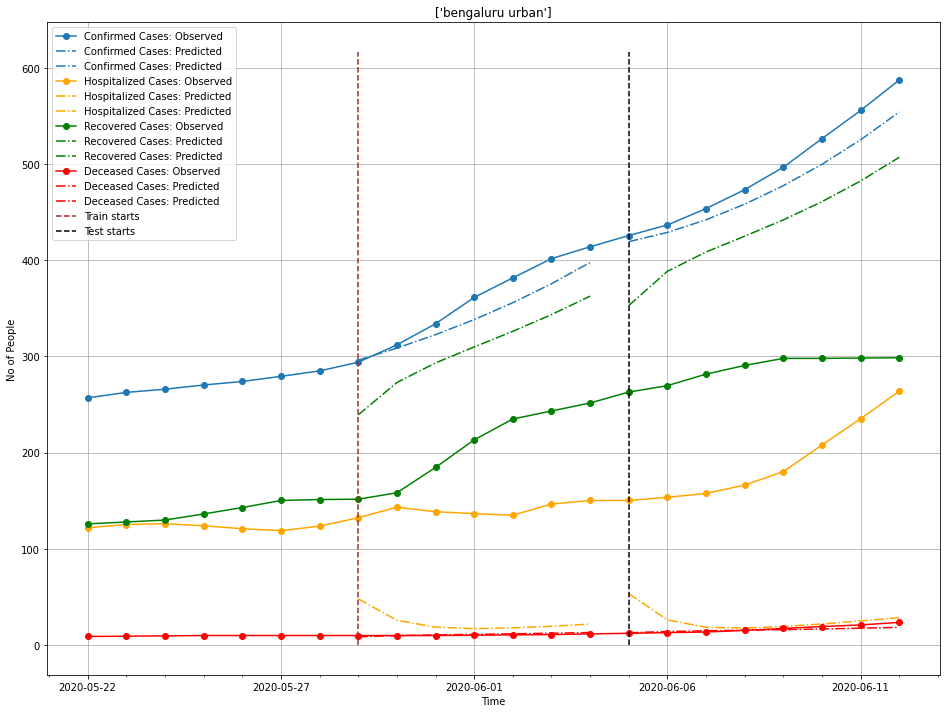

In [53]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


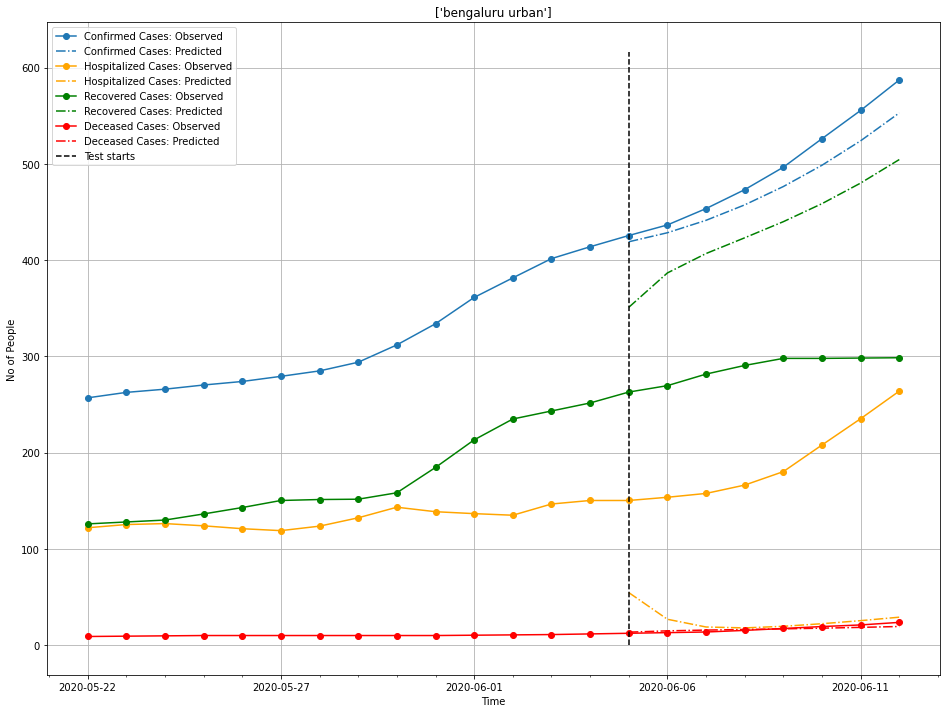

In [54]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


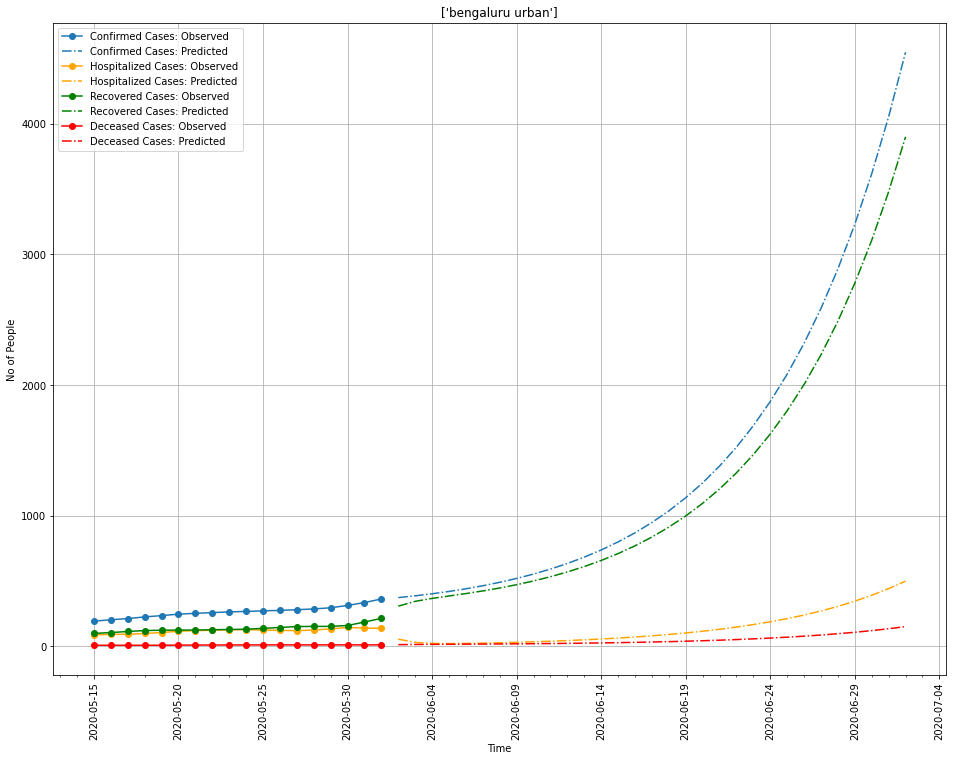

In [55]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, 
        rolling_average = False, uncertainty = False,
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm3.png')

In [56]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.44913259203260203,
     'F_fatalities': 0.038178089048175316,
     'F_hospitalization': 0.09276149018719959,
     'IbyCRatio': 0.1826857381036226,
     'beta': 0.1595705503388931,
     'infectious_period': 8.360249991536397,
     'r0': 1.972958256677376,
     'LatentEbyCRatio': {'5/28/20': 0.44913259203260203,
      '6/4/20': 0.5770377840531294},
     'LatentIbyCRatio': {'5/28/20': 0.1826857381036226,
      '6/4/20': 0.05345642746943342}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.13135036544261827,
     'F_fatalities': 0.0250889309470234,
     'F_hospitalization': 0.09408024547827382,
     'IbyCRatio':

In [57]:
train2_model_params['model_parameters']['modes']['predict_mode'] = "with_uncertainty"

In [58]:
train2_model_params['model_parameters']['uncertainty_parameters'] = {
            "include_mean": "True",
            "percentiles": [10, 20, 30, 40, 50, 60, 70, 80, 90],
            "ci": 95,
            "date_of_interest": "6/3/20",
            "column_of_interest": "hospitalized",
            "window": 5
        }

In [59]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.44913259203260203,
     'F_fatalities': 0.038178089048175316,
     'F_hospitalization': 0.09276149018719959,
     'IbyCRatio': 0.1826857381036226,
     'beta': 0.1595705503388931,
     'infectious_period': 8.360249991536397,
     'r0': 1.972958256677376,
     'LatentEbyCRatio': {'5/28/20': 0.44913259203260203,
      '6/4/20': 0.5770377840531294},
     'LatentIbyCRatio': {'5/28/20': 0.1826857381036226,
      '6/4/20': 0.05345642746943342}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 0.13135036544261827,
     'F_fatalities': 0.0250889309470234,
     'F_hospitalization': 0.09408024547827382,
     'IbyCRatio':

In [60]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


In [61]:
pd.set_option("display.max_columns", None)
uncertainty_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,active_10,hospitalized_10,icu_10,recovered_10,deceased_10,total_10,active_20,hospitalized_20,icu_20,recovered_20,deceased_20,total_20,active_30,hospitalized_30,icu_30,recovered_30,deceased_30,total_30,active_40,hospitalized_40,icu_40,recovered_40,deceased_40,total_40,active_50,hospitalized_50,icu_50,recovered_50,deceased_50,total_50,active_60,hospitalized_60,icu_60,recovered_60,deceased_60,total_60,active_70,hospitalized_70,icu_70,recovered_70,deceased_70,total_70,active_80,hospitalized_80,icu_80,recovered_80,deceased_80,total_80,active_90,hospitalized_90,icu_90,recovered_90,deceased_90,total_90,active_low,hospitalized_low,icu_low,recovered_low,deceased_low,total_low,active_high,hospitalized_high,icu_high,recovered_high,deceased_high,total_high
0,6/2/20,154.385604,2.696169,306.441274,11.774847,372.139503,53.923382,53.923382,99.889661,318.216121,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,53.464691,53.464691,1.069294,304.727893,12.095720,370.288303,56.872005,56.872005,1.137440,326.453015,8.436283,391.761303
1,6/3/20,165.000044,1.454779,343.226200,13.177617,385.499404,29.095587,29.095587,118.389370,356.403817,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,28.292304,28.292304,0.565846,340.359899,13.510080,382.162282,34.958920,34.958920,0.699178,375.047016,9.692061,419.697997
2,6/4/20,180.302619,1.065542,365.734780,14.030756,401.076373,21.310837,21.310837,137.304759,379.765536,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,20.415247,20.415247,0.408305,361.698253,14.357074,396.470574,27.377556,27.377556,0.547551,408.339111,10.552404,446.269071
3,6/5/20,199.893513,0.999203,384.291409,14.732060,419.007523,19.984054,19.984054,157.293071,399.023469,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,19.105279,19.105279,0.382106,379.103169,15.047936,413.256385,24.858246,24.858246,0.497165,436.347782,11.276212,472.482240
4,6/6/20,223.326777,1.05